# Module 2 - Autograded Assignment

### Outline:
**Here are the objectives of this assignment:**

1. Learn how to construct linear models in R, with both single and multiple predictors.
2. Practice how to identify the intercepts and coefficients from these models, and know what they mean.
3. Understand how to construct hat matrices and what information can be gathered from them.
4. Touch on future concepts like Residuals and MSE.

**Here are some general tips:**

1. Read the questions carefully to understand what is being asked.
2. When you feel that your work is completed, feel free to hit the ```Validate``` button to see your results on the *visible* unit tests. If you have questions about unit testing, please refer to the "Module 0: Introduction" notebook provided as an optional resource for this course. In this assignment, there are hidden unit tests that check your code. You will not recieve any feedback for failed hidden unit tests until the assignment is submitted. **Do not misinterpret the feedback from visible unit tests as all possible tests for a given question--write your code carefully!**
3. Before submitting, we recommend restarting the kernel and running all the cells in order that they appear to make sure that there are no additional bugs in your code.
4. There are 50 points total in this assignment.

In [2]:
# This cell loads the necesary libraries for this assignment
library(testthat)
library(tidyverse)
library(ggplot2) #a package for nice plots!
library(dplyr)

## Problem 1: Introduction to Simple Linear Regression (SLR) Models

For this exercise, we will look at a dataset from *Time* Magazine about college rankings. In this dataset, each row (statistical unit) is a college. There are $n = 706$ rows. After some simplifying, the variables included in the dataset are:

- `school`: the name of the school

- `earn`: yearly earnings

- `sat`: average SAT score

- `act`: average ACT score

- `price`: the cost of attendance for four years

In [3]:
college = read.csv("graduate-earnings.txt", sep="\t")

#prints the names in the dataframe
college = college %>%
    select(school = School, earn = Earn, sat = SAT, act = ACT, price = Price)
summary(college)

                     school         earn            sat            act       
 Adelphi University     :  1   Min.   :28300   Min.   : 810   Min.   :15.00  
 Adrian College         :  1   1st Qu.:41100   1st Qu.:1040   1st Qu.:23.00  
 Agnes Scott College    :  1   Median :44750   Median :1120   Median :25.00  
 Albany State University:  1   Mean   :45598   Mean   :1142   Mean   :24.98  
 Albertus Magnus College:  1   3rd Qu.:48900   3rd Qu.:1220   3rd Qu.:27.00  
 Albion College         :  1   Max.   :79700   Max.   :1550   Max.   :34.00  
 (Other)                :700                                                 
     price      
 Min.   :16500  
 1st Qu.:25900  
 Median :44000  
 Mean   :42200  
 3rd Qu.:55500  
 Max.   :70400  
                

#### 1. (a) Create the SLR Model. (5 points)

Let's start simple, and model this relationship between `earn` (the response) and `sat` (the predictor). Save this model into the `slr_earn` variable.

In [4]:
slr_earn = lm(earn~sat, college)
summary(slr_earn)


Call:
lm(formula = earn ~ sat, data = college)

Residuals:
     Min       1Q   Median       3Q      Max 
-16385.1  -3521.6   -246.4   3191.6  24881.0 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14468.088   1776.682   8.143 1.75e-15 ***
sat            27.264      1.545  17.646  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5603 on 704 degrees of freedom
Multiple R-squared:  0.3067,	Adjusted R-squared:  0.3057 
F-statistic: 311.4 on 1 and 704 DF,  p-value: < 2.2e-16


In [5]:
# Test Cell
if(test_that("Does the function return a model?", {expect_is(slr_earn, "lm")})){
    print("Does the function return a model? ... Correct")
    print("Just make sure your predictor and response variables are correct!")
}else{
    print("Test Failed. Tip: Try using the lm() function!")
}


[1] "Does the function return a model? ... Correct"
[1] "Just make sure your predictor and response variables are correct!"


#### 1. (b) Model Interpretation (5 points)

Insert the model's slope and intercept into the `slope` and `intercept` variables, respectively. Do not hard code the answers, instead access the lm object directly.

In [11]:
slope <- slr_earn$coefficients[2]
intercept <- slr_earn$coefficients[1]

In [12]:
# Test Cell
# This cell has hidden test cases that will run after submission.

It can be helpful to visualize our model against the data, to see if it is accurately modeling the data. This code is provided for you.

`geom_smooth()` using formula 'y ~ x'



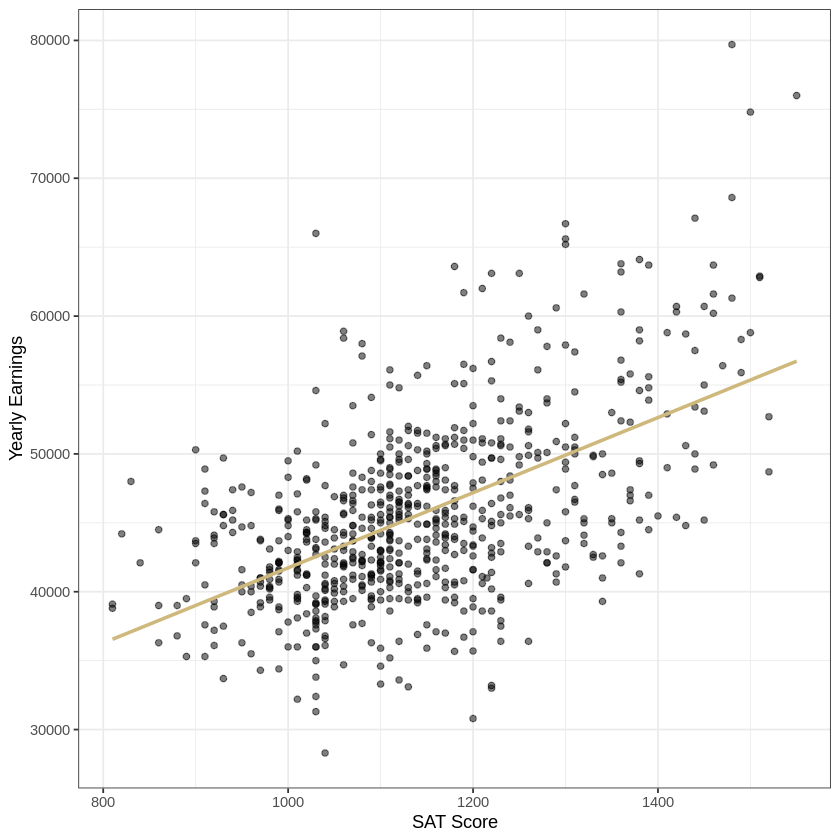

In [13]:
ggplot(college, aes(x = sat, y = earn)) + 
    geom_point( alpha = 0.5) + 
    geom_smooth(method = "lm", se = F, col = "#CFB87C") + 
    xlab("SAT Score") + ylab("Yearly Earnings")+
    theme_bw()

#### 1. (c) Residuals

A useful plot for model analysis is the *Residuals vs Fitted Values* plot. We will learn how to use this plot to detect things like unequal variances, non-linearity and outliers later in the course. For now, let's just see what this plot looks like. Create a scatterplot with the Residuals on the y-axis and the Fitted Values on the x-axis. 

Tip: Use the `resid()` and `fitted()` functions. 

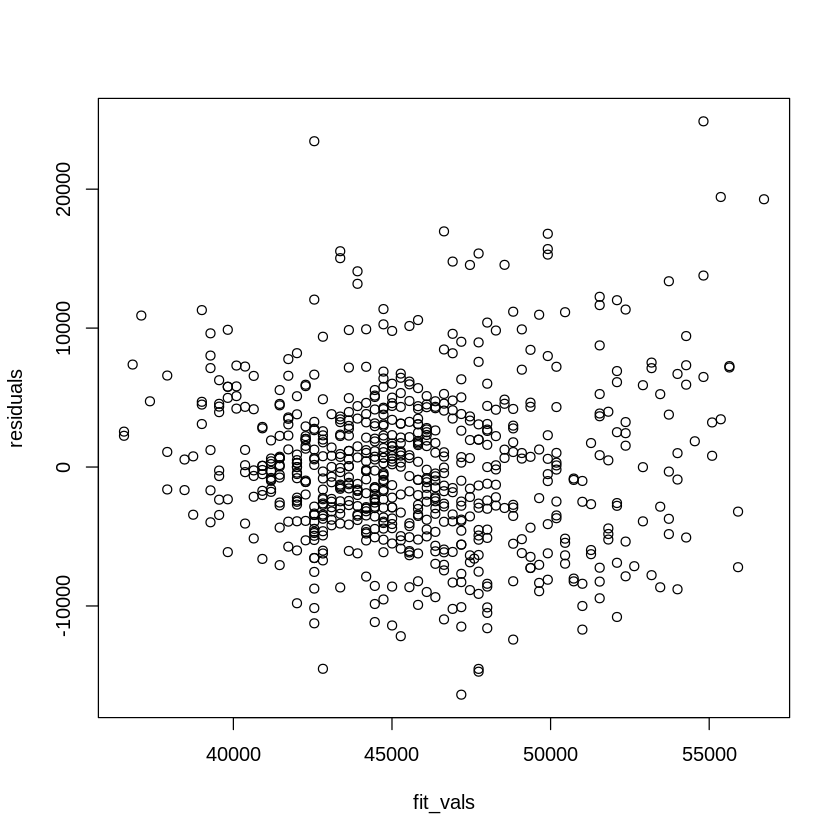

In [14]:
residuals <- resid(slr_earn)
fit_vals <- fitted(slr_earn)

plot(fit_vals, residuals)

#### 1. (d) Sums of Residuals (5 points)

Now calculate the sum of the residuals. Store your answer in the `sum_of_residuals` variable. As a lead up to future lessons, think about why this value is what it is.

In [15]:
sum_of_residuals = sum(residuals)

In [16]:
# Test Cell
# This cell has hidden test cases that will run after submission.

#### 1. (e) Prediction (5 points)

At the (sample) mean value of `sat`, compute the predicted value of `earn`. Store your answer in `yhat`.

In [17]:
x <- mean(college$sat)
yhat <- intercept + slope * x

In [18]:
# Test Cell
# This cell has hidden test cases that will run after submission.

## Problem 2: SLR Hat Matrix (10 points)

The "hat matrix" is how we map from the response, $y$, to the fitted value $\widehat{y}$. Compute the hat matrix $H$ for the `slr_earn` model from scratch (e.g., using functions like `model.matrix()` to obtain the design matrix $X$, `solve()` to compute an inverse, `%*%` for matrix multiplication, and `t()` for transpose). Store $H$ in the variable `hat_matrix`.

Then compute the sum of the diagonals of $H$. Store this value in `sum_of_diagonals`. Do you understand why this value is what it is?


In [19]:
X <- model.matrix(earn~sat, college)
Xt <- t(X)
XtX_inv <- solve(Xt %*% X)

hat_matrix <- X %*% XtX_inv %*% Xt

sum_of_diagonals <- sum(diag(hat_matrix))

In [20]:
# Test Cell
# The hat matrix should be 7x7. Let's check that.
if(test_that("Check matrix dimensions", expect_equal(dim(hat_matrix), c(706,706) ))){
    print("Correct Dimensions!")
}else{
    print("Incorrect dimensions. Make sure your hat matrix equation matches the equation in the videos.")
}
# This cell has hidden test cases that will run after submission.

[1] "Correct Dimensions!"


Note: Above I had you compute a matrix inverse. In practice, [rarely is it a good idea to compute the inverse of a matrix](https://www.johndcook.com/blog/2010/01/19/dont-invert-that-matrix/)  (it's expensive!). There are fancy ways around inverse computation.

## Problem 3: Introduction to Multiple Linear Regression (MLR) Models

In this problem, we will expand our knowledge of linear regression models from only having one predictor to having multiple predictors.

Let's use the Plant Diversity of Northeastern North American Islands dataset from the University of Florida. This data contains the "richness" of native and non-native plant species on 22 different islands.

#### 3. (a) Read in the Data

For practice, try reading in the data yourself. The data file is stored in the same local directory and is named `plant_diverse_island.csv`. You may need to experiment with seperators and headers for the data to load correctly.

In [21]:
# Read in the data
path <- "plant_diverse_island.csv"
plant <- read.csv(path)

head(plant)

,Island,tot.rich,ntv.rich,nonntv.rich,pct.nonntv,area,latitude,elev,dist.mnland,dist.island,soil.types,years.isol,years.deglac,human.pop,human.dens
,<fct>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>,<int>,<int>,<dbl>
1,Appledore Island,182,79,103,57,40,42.99,18,10.0,10.0,6,7000,12640,0,0.00
2,Bear Island,64,43,21,33,3,41.25,13,0.3,0.3,1,3800,15000,0,0.00
3,Block Island,661,396,265,40,2707,41.18,64,20.6,20.6,59,"10,000",15000,1010,0.37
4,Cuttyhunk Island,311,173,138,44,61,41.42,46,10.8,0.4,11,4700,14900,86,1.41
5,Fishers Island,920,516,404,44,1190,41.27,40,2.7,2.7,35,7200,15000,289,0.24
6,Gardiners Island,390,249,141,36,1350,41.08,37,6.7,6.7,37,5000,14950,0,0.00


#### 3. (b) Create a MLR Model (10 points)

Using this dataset, construct a linear model named `mlr_plant` with `tot.rich` as the response and `area`, `dist.island` and `human.dens` as predictors.

In [22]:
mlr_plant = lm(tot.rich ~ area + dist.island + human.dens, plant)
summary(mlr_plant)


Call:
lm(formula = tot.rich ~ area + dist.island + human.dens, data = plant)

Residuals:
    Min      1Q  Median      3Q     Max 
-307.86 -125.86  -52.28  112.09  606.87 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.891e+02  7.238e+01   2.612 0.017633 *  
area        3.139e-02  7.924e-03   3.961 0.000916 ***
dist.island 1.076e+01  7.411e+00   1.452 0.163746    
human.dens  2.401e+02  1.431e+02   1.678 0.110528    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 224.2 on 18 degrees of freedom
Multiple R-squared:  0.658,	Adjusted R-squared:  0.601 
F-statistic: 11.54 on 3 and 18 DF,  p-value: 0.0001876


In [23]:
# Test Cell
if(test_that("Test model type", {expect_is(mlr_plant, "lm")})){
    print("Is a linear model? ... Correct")
    print("Make sure you are modeling the correct predictors!")
}else{
    print("Incorrect type. Tip: Try the lm() function!")
}
# This cell has hidden test cases that will run after submission.

[1] "Is a linear model? ... Correct"
[1] "Make sure you are modeling the correct predictors!"


#### 3. (c) Mean Squared Error (10 points)

The Means Squared Error (MSE) measures how similar the model's estimated values are to the actual values.

Calculate the MSE for the `mlr_plant` model. Store the answer in the variable `MSE_plant`.

In [24]:
plant.aov <- anova(mlr_plant)
MSE_plant <- plant.aov[4, 3]

In [25]:
# Test Cell
# This cell has hidden test cases that will run after submission.